In [ ]:
!git clone -b gpu https://github.com/shpotes/image-classification/
%cd image-classification
!pip install -q -r requirement.txt

In [1]:
import json

import pandas as pd
import tensorflow as tf
import numpy as np

from dataset import *
from utils import * 

from models import LinearModel, LeNet

%load_ext autoreload
%autoreload 2

In [2]:
with open('config.json') as raw_config:
    config = json.load(raw_config)

In [3]:
train_source = build_source_from_metadata(pd.read_csv(config['model']['metadata_path']),
                                        config['model']['data_path'], 'train')
train_source[:5]

[('data/train/b479226f08344398b688dcc6f929c330.jpg', 1),
 ('data/train/2104059e4add482e9c09035b5a70ae4f.jpg', 1),
 ('data/train/a394bd69f5554852ab6816860ff5f6d4.jpg', 3),
 ('data/train/5f6afd93004a43018a51565dd4d89958.jpg', 3),
 ('data/train/832805b9bda445e78b4a0c2675f625e5.jpg', 3)]

In [4]:
def preprocess_image(img, label, model=None, size=(32, 32)):
    img = tf.image.resize(img, size=size)
    img = img / 255.0
    return img, label

dataset = make_dataset(train_source, preprocess_image, training=True, batch_size=3,
                       num_epochs=1, num_parallel_calls=4)
dataset = iter(dataset)

In [5]:
next(dataset)[1]

<tf.Tensor: id=53, shape=(3,), dtype=int32, numpy=array([1, 1, 3], dtype=int32)>

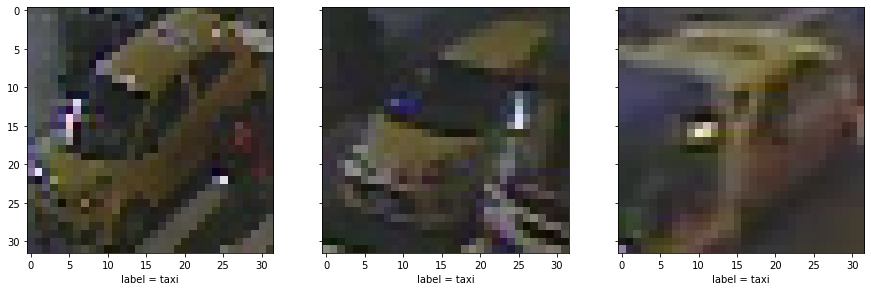

In [6]:
imshow_batch_of_three(next(dataset), config['model']['labels'])

In [7]:
linear_model = LinearModel(config)
print(linear_model)

LinearModel

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 15365     
Total params: 15,365
Trainable params: 15,365
Non-trainable params: 0
_________________________________________________________________


In [29]:
test = linear_model.train(overfit_mode=True)

W0610 03:53:47.524817 140243699922752 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.


Epoch 1/20
1/1 [==============================] - 1s 676ms/step - loss: 0.5633 - accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 9ms/step - loss: 0.3474 - accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 7ms/step - loss: 0.2875 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 8ms/step - loss: 0.3016 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 11ms/step - loss: 0.3172 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 8ms/step - loss: 0.3121 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 6ms/step - loss: 0.2892 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 6ms/step - loss: 0.2577 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 6ms/step - loss: 0.2268 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 6ms/step - loss: 0.2031 - accuracy: 1.0000
Epoch 11/20
1/1 [===================

In [31]:
test = linear_model.train()

W0610 03:54:29.713122 140243699922752 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.


Epoch 1/400
182/182 [==============================] - 2s 12ms/step - loss: 0.7139 - accuracy: 0.7366
Epoch 2/400
182/182 [==============================] - 1s 8ms/step - loss: 0.6960 - accuracy: 0.7431
Epoch 3/400
182/182 [==============================] - 1s 8ms/step - loss: 0.6926 - accuracy: 0.7452
Epoch 4/400
182/182 [==============================] - 1s 8ms/step - loss: 0.6893 - accuracy: 0.7472
Epoch 5/400
182/182 [==============================] - 1s 8ms/step - loss: 0.6862 - accuracy: 0.7486
Epoch 6/400
182/182 [==============================] - 2s 9ms/step - loss: 0.6832 - accuracy: 0.7490
Epoch 7/400
182/182 [==============================] - 2s 9ms/step - loss: 0.6802 - accuracy: 0.7514
Epoch 8/400
182/182 [==============================] - 1s 7ms/step - loss: 0.6774 - accuracy: 0.7517
Epoch 9/400
182/182 [==============================] - 2s 9ms/step - loss: 0.6745 - accuracy: 0.7528
Epoch 10/400
182/182 [==============================] - 2s 8ms/step - loss: 0.6718 - accur

182/182 [==============================] - 1s 8ms/step - loss: 0.4599 - accuracy: 0.8408
Epoch 161/400
182/182 [==============================] - 1s 8ms/step - loss: 0.4590 - accuracy: 0.8411
Epoch 162/400
182/182 [==============================] - 1s 7ms/step - loss: 0.4582 - accuracy: 0.8411
Epoch 163/400
182/182 [==============================] - 1s 8ms/step - loss: 0.4574 - accuracy: 0.8411
Epoch 164/400
182/182 [==============================] - 1s 7ms/step - loss: 0.4566 - accuracy: 0.8422
Epoch 165/400
182/182 [==============================] - 1s 7ms/step - loss: 0.4558 - accuracy: 0.8422
Epoch 166/400
182/182 [==============================] - 1s 7ms/step - loss: 0.4550 - accuracy: 0.8432
Epoch 167/400
182/182 [==============================] - 1s 7ms/step - loss: 0.4543 - accuracy: 0.8435
Epoch 168/400
182/182 [==============================] - 1s 7ms/step - loss: 0.4535 - accuracy: 0.8442
Epoch 169/400
182/182 [==============================] - 1s 7ms/step - loss: 0.4527 - a

182/182 [==============================] - 1s 7ms/step - loss: 0.3661 - accuracy: 0.8876
Epoch 319/400
182/182 [==============================] - 1s 7ms/step - loss: 0.3656 - accuracy: 0.8872
Epoch 320/400
182/182 [==============================] - 1s 7ms/step - loss: 0.3652 - accuracy: 0.8879
Epoch 321/400
182/182 [==============================] - 1s 7ms/step - loss: 0.3648 - accuracy: 0.8879
Epoch 322/400
182/182 [==============================] - 1s 7ms/step - loss: 0.3643 - accuracy: 0.8886
Epoch 323/400
182/182 [==============================] - 1s 7ms/step - loss: 0.3639 - accuracy: 0.8889
Epoch 324/400
182/182 [==============================] - 1s 7ms/step - loss: 0.3635 - accuracy: 0.8893
Epoch 325/400
182/182 [==============================] - 1s 7ms/step - loss: 0.3630 - accuracy: 0.8900
Epoch 326/400
182/182 [==============================] - 1s 7ms/step - loss: 0.3626 - accuracy: 0.8900
Epoch 327/400
182/182 [==============================] - 1s 7ms/step - loss: 0.3622 - a

In [32]:
linear_model.evaluate()

train
182/182 [==============================] - 1s 7ms/step - loss: 0.3316 - accuracy: 0.8876
test
47/47 [==============================] - 0s 8ms/step - loss: 1.1909 - accuracy: 0.6405


In [64]:
with open('config.json') as raw_config:
    config = json.load(raw_config)

lenet = LeNet(config)
print(lenet)

LeNet

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
C1 (Conv2D)                  (None, 28, 28, 6)         456       
_________________________________________________________________
S2 (AveragePooling2D)        (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)            

In [70]:
lenet.train(overfit_mode=True)

W0610 04:45:21.735181 140558240872256 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.9058 - accuracy: 0.4000
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6187 - accuracy: 0.6000
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4273 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3019 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2184 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1627 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.1250 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0980 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0777 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0620 - accuracy: 1.0000
Epoch 11/100
1/1 [===

Epoch 84/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 93/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 94/1

In [71]:
lenet.evaluate(overfit_mode=True)

train
1/1 [==============================] - 0s 204ms/step - loss: 0.7064 - accuracy: 0.6000
test
148/148 [==============================] - 1s 6ms/step - loss: 1.6034 - accuracy: 0.5284


In [72]:
test = lenet.train()

W0610 04:45:41.921886 140558240872256 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.


Epoch 1/400
582/582 [==============================] - 8s 13ms/step - loss: 0.8887 - accuracy: 0.6668
Epoch 2/400
582/582 [==============================] - 6s 11ms/step - loss: 0.7999 - accuracy: 0.6946
Epoch 3/400
582/582 [==============================] - 6s 10ms/step - loss: 0.7358 - accuracy: 0.7184
Epoch 4/400
582/582 [==============================] - 6s 10ms/step - loss: 0.6675 - accuracy: 0.7497
Epoch 5/400
582/582 [==============================] - 6s 10ms/step - loss: 0.5913 - accuracy: 0.7854
Epoch 6/400
582/582 [==============================] - 6s 10ms/step - loss: 0.5139 - accuracy: 0.8191
Epoch 7/400
582/582 [==============================] - 6s 11ms/step - loss: 0.4369 - accuracy: 0.8477
Epoch 8/400
582/582 [==============================] - 6s 11ms/step - loss: 0.3630 - accuracy: 0.8831
Epoch 9/400
582/582 [==============================] - 6s 11ms/step - loss: 0.3007 - accuracy: 0.9075
Epoch 10/400
582/582 [==============================] - 7s 12ms/step - loss: 0.233

KeyboardInterrupt: 